In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import pickle
import random

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15) 

In [2]:
file1 = open("qcd_100000_pt_1000_1200.pkl", 'rb')
background = pickle.load(file1)
file2 = open("higgs_100000_pt_1000_1200.pkl", 'rb')
signal = pickle.load(file2)

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')


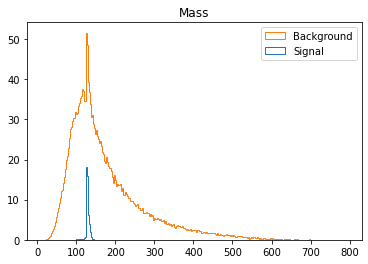

In [3]:
print(background.keys())
x= [signal['mass'], background['mass']]
dataweights = [[.0005]*len(signal['mass']), [.02]*len(background['mass'])]
plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
plt.title("Mass")
plt.legend()
plt.show()

Evaluate expected significance without any event selection.

Use Poisson statistics for significance calculation

Compare the exact significance to the approximation  NHiggs/(√NQCD) . If they are equivalent, explain your findings.

In [6]:
p = (1-scipy.stats.poisson.cdf(2050, 2000))
print('sigma significance of {0:1.2f}'.format(stats.norm.ppf(1-p)))

print('{0:1.2f}'.format(50/np.sqrt(2000)))

sigma significance of 1.13
1.12


#### 2. Identify mass cuts to optimize the expected significance.
Try different mass cuts systematically

Evaluate expected significance for each set of mass cuts

Identify the set of mass cuts which give you the highest significance.

Text(0.5,1,'Mass')

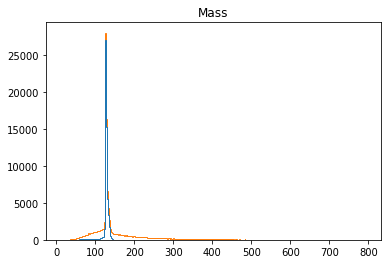

In [7]:
x= [signal['mass'], background['mass']]
plt.hist(x, 500, histtype="step", stacked=True, fill=False)
plt.title("Mass")

In [8]:
def slicer(lower, upper, key, signal, bkgd):
    bkgd_n = bkgd[key]
    signal_n = signal[key]
    bkgd_slice = bkgd_n[lower:upper:1]
    signal_slice = signal_n[lower:upper:1]
    
    bkgd_avg = 200000 * len(bkgd_slice)/len(bkgd_n)
    signal_avg = 5000 * len(signal_slice)/len(signal_n)
    
    p = (1-scipy.stats.poisson.cdf(bkgd_avg + signal_avg, bkgd_avg))
    print('Significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),lower,upper))

    return(signal_slice, bkgd_slice)

signal_slice, bkgd_slice = slicer(0, 9000, 'mass', signal, background)
signal_slice, bkgd_slice = slicer(0, 22000, 'mass', signal, background)

Significance of 3.345 for a cut from 0.0 to 9000.0
Significance of 5.226 for a cut from 0.0 to 22000.0


#### 3. Make two sets of stacked histogram plots for the rest of the features
Set A without any event selection

Can you identify another feature as discriminative as mass? (i.e. equal or better significance after feature cut)

Set B with your optimal mass cuts

Can you identify another feature to further improve your expected signifiance?

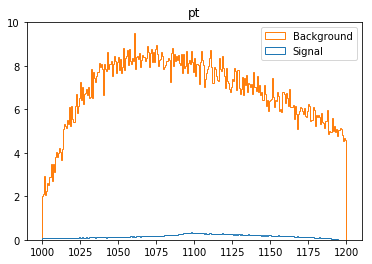

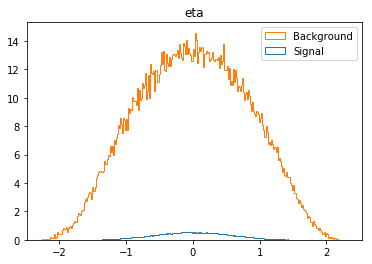

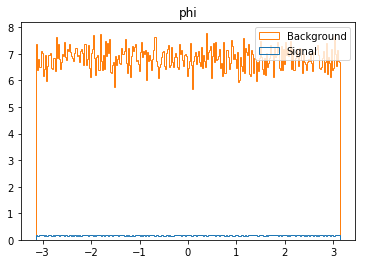

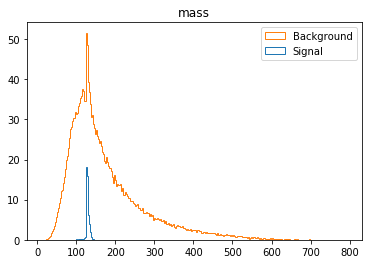

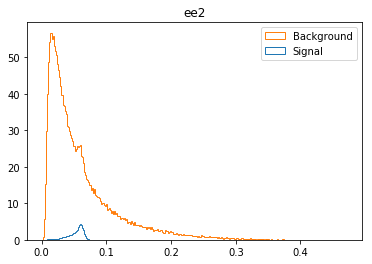

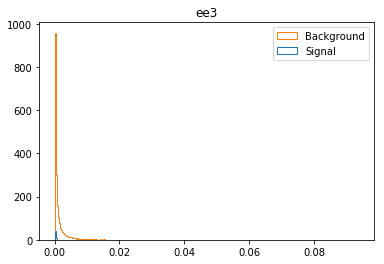

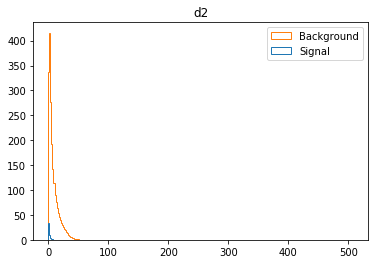

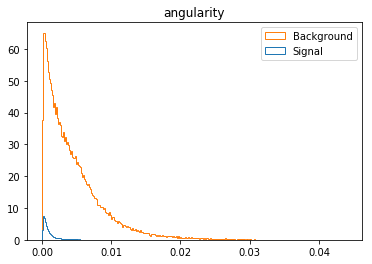

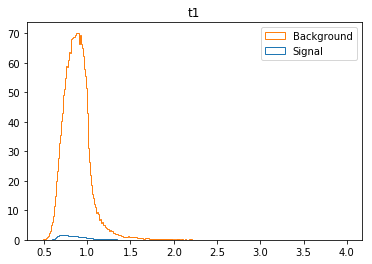

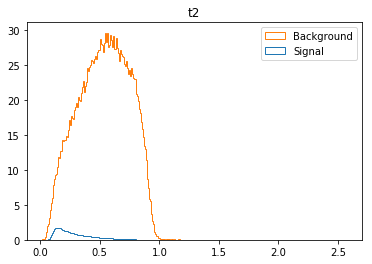

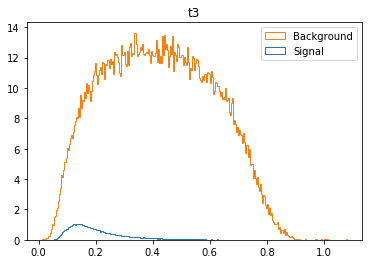

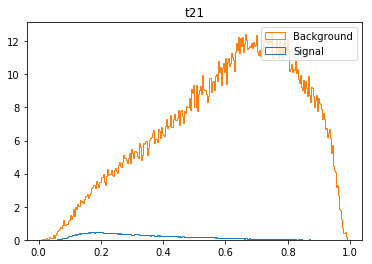

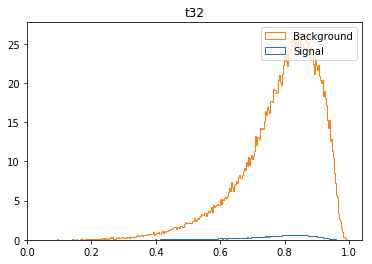

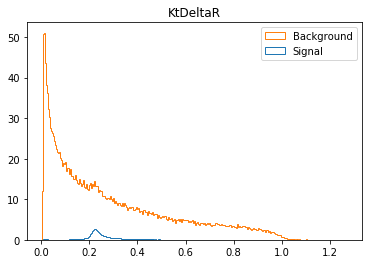

In [9]:
def plotWithoutCuts(key):
    x= [signal[key], background[key]]
    dataweights = [[.0005]*len(signal[key]), [.02]*len(background[key])]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithoutCuts(key)

Significance of 5.226 for a cut from 0.0 to 22000.0


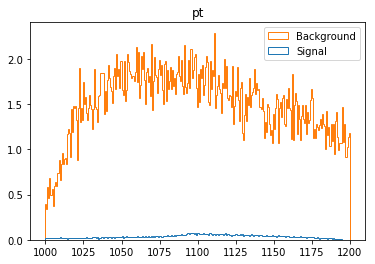

Significance of 5.226 for a cut from 0.0 to 22000.0


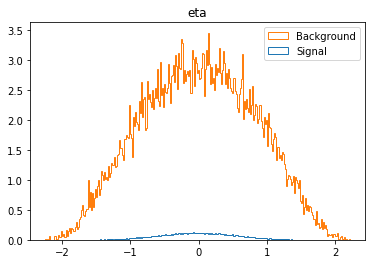

Significance of 5.226 for a cut from 0.0 to 22000.0


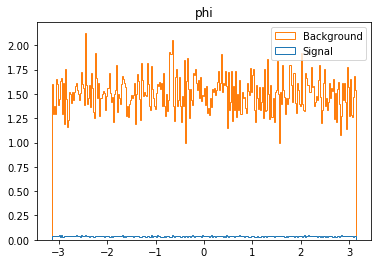

Significance of 5.226 for a cut from 0.0 to 22000.0


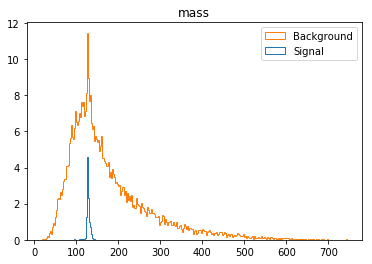

Significance of 5.226 for a cut from 0.0 to 22000.0


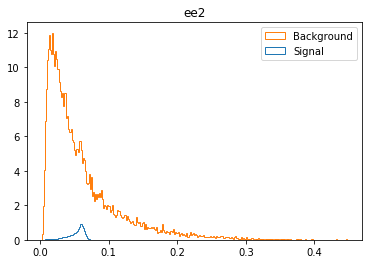

Significance of 5.226 for a cut from 0.0 to 22000.0


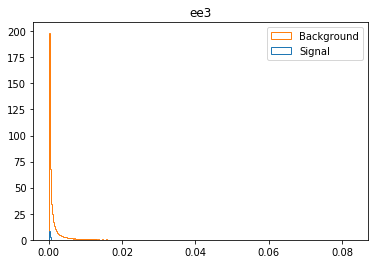

Significance of 5.226 for a cut from 0.0 to 22000.0


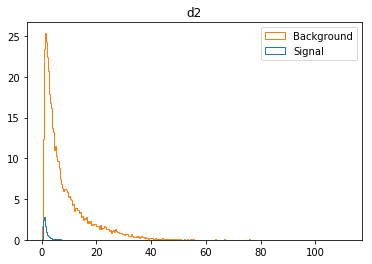

Significance of 5.226 for a cut from 0.0 to 22000.0


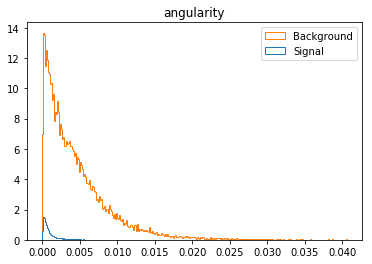

Significance of 5.226 for a cut from 0.0 to 22000.0


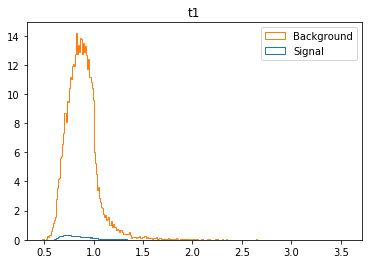

Significance of 5.226 for a cut from 0.0 to 22000.0


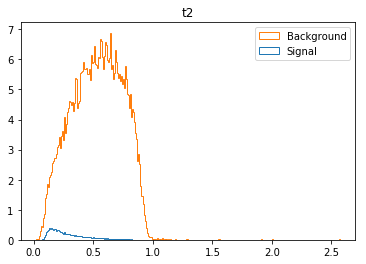

Significance of 5.226 for a cut from 0.0 to 22000.0


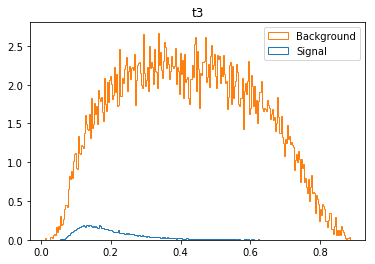

Significance of 5.226 for a cut from 0.0 to 22000.0


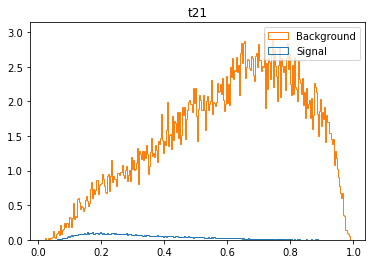

Significance of 5.226 for a cut from 0.0 to 22000.0


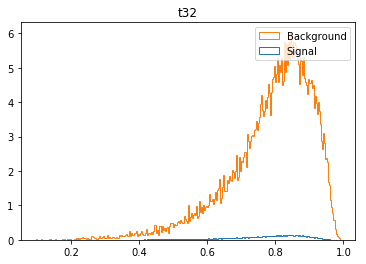

Significance of 5.226 for a cut from 0.0 to 22000.0


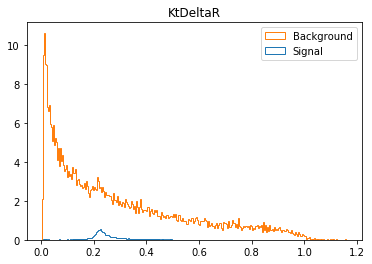

In [10]:
def plotWithCuts(key):
    signal_slice, background_slice = slicer(0, 22000, key, signal, background)
    x= [signal_slice, background_slice]
    dataweights = [[.0005]*len(signal_slice), [.02]*len(background_slice)]
    plt.hist(x, 300, histtype="step", weights = dataweights, fill=False, stacked=True, label = ("Signal","Background"))
    plt.title(key)
    plt.legend()
    plt.show()

for key in background.keys():
    plotWithCuts(key)

#### 4. Optimize event selections using multiple features (if necessary)
Find a set of feature cuts which achieve high expected significance.

Compare significance (before/after event selection) derived in your pT samples to your lab partner. Describe your findings.

In [41]:
slicer(0, 20100, 'd2', signal, background)
slicer(0, 20200, 'd2', signal, background)
slicer(0, 20150, 'd2', signal, background)

Significance of 4.995 for a cut from 0.0 to 20100.0
Significance of 5.008 for a cut from 0.0 to 20200.0
Significance of 4.999 for a cut from 0.0 to 20150.0


(0         1.565921
 1         0.822408
 2         1.159519
 3         1.131290
 4         5.084335
 5         1.989337
 6         0.832268
 7         2.289501
 8         0.894442
 9         1.017620
 10        4.674804
 11        0.996752
 12        0.899540
 13        1.202883
 14        1.488912
 15        1.124519
 16        1.386024
 17        2.840270
 18        5.207616
 19        0.711099
 20        1.380855
 21        1.832899
 22        1.872042
 23        1.099399
 24        0.628586
 25        0.722712
 26        1.760597
 27        1.720195
 28        0.621160
 29        1.366647
            ...    
 20120     0.951781
 20121     0.840455
 20122     0.793342
 20123     0.843303
 20124     0.479805
 20125     1.826442
 20126     0.621081
 20127     1.395088
 20128     0.771228
 20129     0.580317
 20130     1.226816
 20131     2.406634
 20132     1.290092
 20133     0.867616
 20134     1.932373
 20135     0.929194
 20136     1.043237
 20137     0.558117
 20138    17.376566


#### 5. Plot 2-dimensional plots using the top two most discriminative features
Can you find a curve or a linear combination in this 2D plane which gives even better sensitivity?

Significance of 1.585 for a cut from 0.0 to 2000.0
Significance of 1.585 for a cut from 0.0 to 2000.0


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([ 29.38508763,  29.77434593,  30.16360423,  30.55286252,
         30.94212082,  31.33137912,  31.72063742,  32.10989572,
         32.49915402,  32.88841232,  33.27767061,  33.66692891,
         34.05618721,  34.44544551,  34.83470381,  35.22396211,
         35.61322041,  36.0024787 ,  36.391737  ,  36.7809953 ,
         37.1702536 ,  37.5595119 ,  37.9487702 ,  38.3380285 ,
         38.72728679,  39.11654509,  39.50580339,  39.89506169,
         40.28431999,  40.67357829,  41.06283659,  41.45209488,
         41.84135318,  42.23061148,  42.61986978,  43.00912808,
         43.39838638,  43.78764468,  44.17690297,  44.56616127,
         44.95541957,  45.34467787,  45.73393617,  46.12319447,
         46.51245277,  46.90171106,  47.2909693

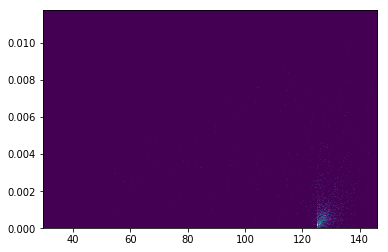

In [13]:
mass_signal_slice, background_slice = slicer(0, 2000, 'mass', signal, background)
ee2_signal_slice, background_slice = slicer(0, 2000, 'angularity', signal, background)
plt.hist2d(mass_signal_slice, ee2_signal_slice, bins = 300)